In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/BiologicalScientist/screen_assembly_colab/blob/main/Copy_of_Proof_of_concept.ipynb)

In [1]:
#Install conda using the new conda-colab library
!pip3 install screen_assembly
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()

#Install blast and clustal with bioconda
!conda install -c bioconda blast
!conda install -c bioconda clustalo





     |████████████████████████████████| 2.3 MB 8.7 MB/s 
⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:32
🔁 Restarting kernel...
Solving environment: | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - blast


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blast-2.9.0                |  pl526he19e7b1_7        19.5 MB  bioconda
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2021.9.30  |       h06a4308_1         116 KB
    certifi-2021.10.8          |   py37h06a4308_0         151 KB
    conda-4.10.3               |   py37h06a4308_0         2.9 MB
    curl-7.71.1                |       hbc83047_1         140 KB
    entrez-direct-15.6         |       he8

In [1]:
!blastn -h

USAGE
  blastn [-h] [-help] [-import_search_strategy filename]
    [-export_search_strategy filename] [-task task_name] [-db database_name]
    [-dbsize num_letters] [-gilist filename] [-seqidlist filename]
    [-negative_gilist filename] [-negative_seqidlist filename]
    [-taxids taxids] [-negative_taxids taxids] [-taxidlist filename]
    [-negative_taxidlist filename] [-entrez_query entrez_query]
    [-db_soft_mask filtering_algorithm] [-db_hard_mask filtering_algorithm]
    [-subject subject_input_file] [-subject_loc range] [-query input_file]
    [-out output_file] [-evalue evalue] [-word_size int_value]
    [-gapopen open_penalty] [-gapextend extend_penalty]
    [-perc_identity float_value] [-qcov_hsp_perc float_value]
    [-max_hsps int_value] [-xdrop_ungap float_value] [-xdrop_gap float_value]
    [-xdrop_gap_final float_value] [-searchsp int_value] [-penalty penalty]
    [-reward reward] [-no_greedy] [-min_raw_gapped_score int_value]
    [-template_type type] [-template_length

In [2]:
!screen_assembly3.py -h 

usage: screen_assembly3.py [-h] [-q QUERY] [-i INPUT_FOLDER] [-t THREADS] [-a]
                           [-x] [-p PERCENT_IDENTITY] [-l PERCENT_LENGTH] [-o]
                           [-k] [-y] [-r] [-c LABEL_ROTATION] [-s] [-g]
                           [-n NUMBER_SAMPLES_ON_BOX_PLOT]

Screens assemblies for given gene/genes/proteins/operons.

optional arguments:
  -h, --help            show this help message and exit

Required:
  Need query fastas and a database to look in

  -q QUERY, --query QUERY
                        Query sequences fasta. Must only have one . in name.
                        ie sample_1.fa, NOT sample.1.fa
  -i INPUT_FOLDER, --input_folder INPUT_FOLDER
                        Folder with ONLY db seqs in it. Can be one file or
                        many. Must be the same sequence type.

Options:
  Alignment required for SNP plots, this will increase run time

  -t THREADS, --threads THREADS
                        How many threads to give blast, muscle, rax

In [3]:
!pwd
!ls
!rm -r screen_assembly_colab
!git clone https://github.com/BiologicalScientist/screen_assembly_colab
!ls
!ls -lh

/content
condacolab_install.log	sample_data
rm: cannot remove 'screen_assembly_colab': No such file or directory
Cloning into 'screen_assembly_colab'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.
condacolab_install.log	sample_data  screen_assembly_colab
total 20K
-rw-r--r-- 1 root root 8.9K Oct 22 02:30 condacolab_install.log
drwxr-xr-x 1 root root 4.0K Oct  8 13:45 sample_data
drwxr-xr-x 4 root root 4.0K Oct 22 02:32 screen_assembly_colab


In [4]:
!mkdir screen_results
%cd screen_results

/content/screen_results


In [5]:
!screen_assembly3.py -q ../screen_assembly_colab/virulence_and_AMR.fa -i ../screen_assembly_colab/reference_genomes -a -x -p 80 -l 80

cating assemblies...
Getting assembly names...
3 assemblies used
Starting Blast...
testing query seqs
fine ->  DNA
testing db seqs
fine ->  DNA
makeblastdb makeblastdb -in ../screen_assembly_colab/reference_genomes/concatenated_assemblies/concatenated_assemblies.fasta -parse_seqids -dbtype nucl


Building a new DB, current time: 10/22/2021 02:32:21
New DB name:   /content/screen_assembly_colab/reference_genomes/concatenated_assemblies/concatenated_assemblies.fasta
New DB title:  ../screen_assembly_colab/reference_genomes/concatenated_assemblies/concatenated_assemblies.fasta
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 3 sequences in 0.059979 seconds.
makeblastdb done
blastn -query ../screen_assembly_colab/virulence_and_AMR.fa -db ../screen_assembly_colab/reference_genomes/concatenated_assemblies/concatenated_assemblies.fasta -out blast_out.txt -outfmt 6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send eval

In [6]:
!ls

assembly_names.txt		  sdaD2_Spy1415
binary_hits_boiled_down.csv	  spd3_M5005_Spy_1169
binary_hits.csv			  speA2_M5005_Spy0996
blast_out.txt			  speC_SPy_0711
box_and_carriage_plot1.svg	  ssa_SpyM3_0920
ermB_JN899585_macrolide		  tetM_X92947_tetracycline
length_and_sequence_identity.csv  total_hits.csv
mf2_SPy_0712			  versions.txt
names_map.csv			  virulence_and_AMR_itol.txt


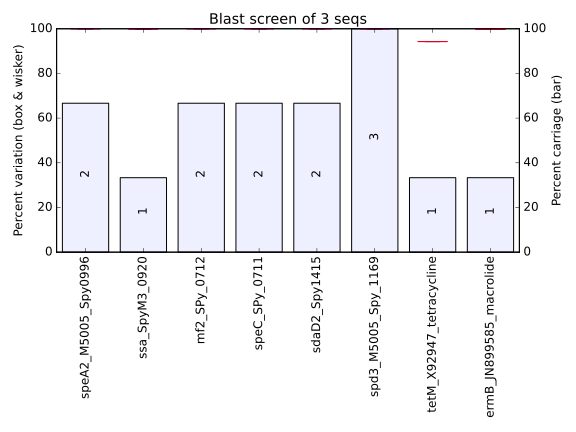

In [10]:
from IPython.display import SVG, display
display(SVG('box_and_carriage_plot1.svg'))
